In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
url = "winequality-red.csv"
wine_data = pd.read_csv(url, sep=",")

In [2]:
wine_data

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,5
2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,5
3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,6
4,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
...,...,...,...,...,...,...,...,...,...,...,...,...
1594,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,5
1595,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2,6
1596,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,6
1597,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,5


https://forecastegy.com/posts/does-linear-regression-require-feature-scaling/

In [3]:
from sklearn.model_selection import train_test_split

X = wine_data.drop('quality', axis=1)
y = wine_data['quality']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [4]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

# now using all independent variable for training so variables 
# fixed acidity, volatile acidity, citric acid, residual sugar, chlorides, free sulfur dioxide, total sulfur dioxide, density, pH,sulphates and alcohol

lin_regressor = LinearRegression()
lin_regressor.fit(X_train, y_train)

y_pred = lin_regressor.predict(X_test)

mse_test = mean_squared_error(y_test, y_pred)

print("Test MSE:", mse_test)

Test MSE: 0.4112348717504203


# First attempt with SGDRegressor

In [5]:
from sklearn.linear_model import SGDRegressor

# now using all independent variable for training so variables 
# fixed acidity, volatile acidity, citric acid, residual sugar, chlorides, free sulfur dioxide, total sulfur dioxide, density, pH,sulphates and alcohol

sgd_regressor = SGDRegressor(random_state=42)  # We did not need random_state with LinearRegression as the solution was closed form
sgd_regressor.fit(X_train, y_train)

y_pred = sgd_regressor.predict(X_test)

mse_test_sgd = mean_squared_error(y_test, y_pred)

print("Test MSE:", mse_test_sgd)

Test MSE: 2.9263290312585674e+23


# Second attempt with SGDRegressor
We will need to set the eta - see the slides and the sklearn documentation for SGDRegressor

In [6]:
from sklearn.linear_model import SGDRegressor

# now using all independent variable for training so variables 
# fixed acidity, volatile acidity, citric acid, residual sugar, chlorides, free sulfur dioxide, total sulfur dioxide, density, pH,sulphates and alcohol


sgd_regressor = SGDRegressor(eta0 = 0.0001, random_state=42) # now you can try changing the eta0 into different values and check the MSE after each run
sgd_regressor.fit(X_train, y_train)

y_pred = sgd_regressor.predict(X_test)

mse_test_sgd = mean_squared_error(y_test, y_pred)

print("Test MSE:", mse_test_sgd)

Test MSE: 0.4911961101357746


In [7]:
sgd_regressor.coef_

array([ 0.15593809,  0.00684309,  0.00426864,  0.02441388,  0.00173691,
        0.01147041, -0.00341628,  0.03187438,  0.11169277,  0.02713625,
        0.36324753])

In [8]:
# Course book edition 2 page 76
from sklearn.model_selection import GridSearchCV

param_grid = [  {'eta0': [1, 0.1, 0.01, 0.001, 0.0001, 2]}   ]

sgd_regressor = SGDRegressor()
gridsearch = GridSearchCV(sgd_regressor, param_grid, cv=5, scoring='neg_mean_squared_error', return_train_score=True)

gridsearch.fit(X, y)

GridSearchCV(cv=5, estimator=SGDRegressor(),
             param_grid=[{'eta0': [1, 0.1, 0.01, 0.001, 0.0001, 2]}],
             return_train_score=True, scoring='neg_mean_squared_error')

In [9]:
gridsearch.best_params_

{'eta0': 0.0001}

In [10]:
gridsearch.best_estimator_

SGDRegressor(eta0=0.0001)

In [11]:
gridsearch.cv_results_

{'mean_fit_time': array([0.00948195, 0.00837154, 0.00633569, 0.00420599, 0.00440707,
        0.00734248]),
 'std_fit_time': array([0.00163033, 0.00149568, 0.00072428, 0.00068334, 0.00036394,
        0.00107999]),
 'mean_score_time': array([0.00182805, 0.00172544, 0.00124416, 0.00111175, 0.0012157 ,
        0.00144844]),
 'std_score_time': array([0.00047716, 0.00036376, 0.00025524, 0.00011236, 0.00040415,
        0.00038427]),
 'param_eta0': masked_array(data=[1, 0.1, 0.01, 0.001, 0.0001, 2],
              mask=[False, False, False, False, False, False],
        fill_value='?',
             dtype=object),
 'params': [{'eta0': 1},
  {'eta0': 0.1},
  {'eta0': 0.01},
  {'eta0': 0.001},
  {'eta0': 0.0001},
  {'eta0': 2}],
 'split0_test_score': array([-6.59664413e+28, -2.09545636e+27, -5.24829923e+21, -4.64686828e-01,
        -4.22320626e-01, -4.34229507e+27]),
 'split1_test_score': array([-2.27139228e+28, -1.70011880e+26, -2.07130968e+23, -6.80387871e-01,
        -6.18396923e-01, -1.7344198

In [12]:
gridsearch.get_params

<bound method BaseEstimator.get_params of GridSearchCV(cv=5, estimator=SGDRegressor(),
             param_grid=[{'eta0': [1, 0.1, 0.01, 0.001, 0.0001, 2]}],
             return_train_score=True, scoring='neg_mean_squared_error')>

In [13]:
gridsearch.best_score_

-0.5240883755573558

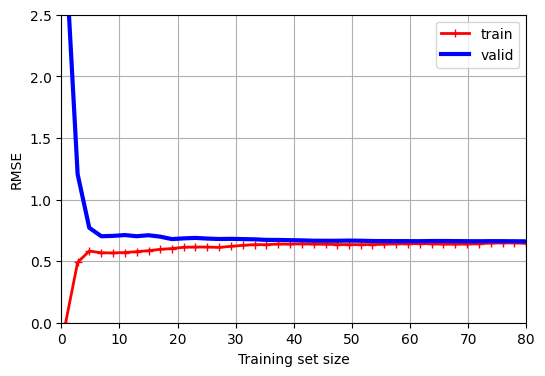

In [14]:
from sklearn.model_selection import learning_curve

train_sizes, train_scores, valid_scores = learning_curve(LinearRegression(),
                                                         X, y, train_sizes=np.linspace(0.01, 1.0, 40), cv=5,
                                                         scoring="neg_root_mean_squared_error")
train_errors = -train_scores.mean(axis=1)
valid_errors = -valid_scores.mean(axis=1)

plt.figure(figsize=(6, 4))  # extra code – not needed, just formatting
plt.plot(train_sizes/X.shape[0]*100, train_errors, "r-+", linewidth=2, label="train")
plt.plot(train_sizes/X.shape[0]*100, valid_errors, "b-", linewidth=3, label="valid")

# extra code – beautifies and saves Figure 4–15
plt.xlabel("Training set size")
plt.ylabel("RMSE")
plt.grid()
plt.legend(loc="upper right")
plt.axis([0, 80, 0, 2.5])

plt.show()

In [15]:
#train_scores

In [16]:
train_scores.mean(axis=1)

array([-2.08695237e-14, -4.90096796e-01, -5.81555962e-01, -5.67810746e-01,
       -5.66735606e-01, -5.69833941e-01, -5.76698372e-01, -5.84851503e-01,
       -5.95461112e-01, -6.02114683e-01, -6.12563820e-01, -6.14276035e-01,
       -6.14397130e-01, -6.11210062e-01, -6.19935299e-01, -6.27752869e-01,
       -6.34021726e-01, -6.33634190e-01, -6.38606206e-01, -6.37625402e-01,
       -6.40418720e-01, -6.37706570e-01, -6.36530997e-01, -6.34824959e-01,
       -6.33949050e-01, -6.33957467e-01, -6.34663074e-01, -6.36607899e-01,
       -6.40470571e-01, -6.40326348e-01, -6.42964440e-01, -6.40367582e-01,
       -6.37814392e-01, -6.37295711e-01, -6.38411400e-01, -6.41611513e-01,
       -6.46364837e-01, -6.47879025e-01, -6.48025827e-01, -6.44048124e-01])

In [17]:
X.size

17589

In [18]:
train_errors

array([2.08695237e-14, 4.90096796e-01, 5.81555962e-01, 5.67810746e-01,
       5.66735606e-01, 5.69833941e-01, 5.76698372e-01, 5.84851503e-01,
       5.95461112e-01, 6.02114683e-01, 6.12563820e-01, 6.14276035e-01,
       6.14397130e-01, 6.11210062e-01, 6.19935299e-01, 6.27752869e-01,
       6.34021726e-01, 6.33634190e-01, 6.38606206e-01, 6.37625402e-01,
       6.40418720e-01, 6.37706570e-01, 6.36530997e-01, 6.34824959e-01,
       6.33949050e-01, 6.33957467e-01, 6.34663074e-01, 6.36607899e-01,
       6.40470571e-01, 6.40326348e-01, 6.42964440e-01, 6.40367582e-01,
       6.37814392e-01, 6.37295711e-01, 6.38411400e-01, 6.41611513e-01,
       6.46364837e-01, 6.47879025e-01, 6.48025827e-01, 6.44048124e-01])

In [19]:
X.shape[0]

1599

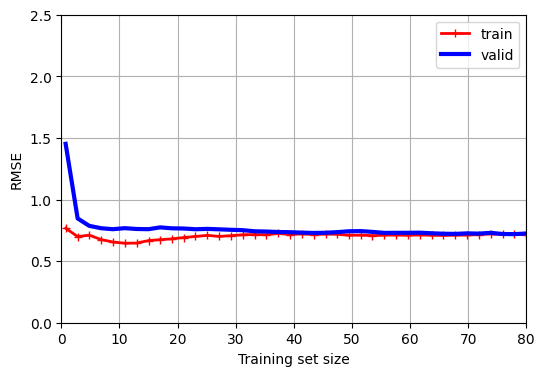

In [20]:
from sklearn.model_selection import learning_curve

train_sizes, train_scores, valid_scores = learning_curve(SGDRegressor(eta0 = 0.0001),
                                                         X, y, train_sizes=np.linspace(0.01, 1.0, 40), cv=5,
                                                         scoring="neg_root_mean_squared_error")
train_errors = -train_scores.mean(axis=1)
valid_errors = -valid_scores.mean(axis=1)

plt.figure(figsize=(6, 4))  # extra code – not needed, just formatting
plt.plot(train_sizes/X.shape[0]*100, train_errors, "r-+", linewidth=2, label="train")
plt.plot(train_sizes/X.shape[0]*100, valid_errors, "b-", linewidth=3, label="valid")

# extra code – beautifies and saves Figure 4–15
plt.xlabel("Training set size")
plt.ylabel("RMSE")
plt.grid()
plt.legend(loc="upper right")
plt.axis([0, 80, 0, 2.5])

plt.show()

# Lasso

In [21]:
from sklearn.linear_model import Lasso

# now using all independent variable for training so variables 
# fixed acidity, volatile acidity, citric acid, residual sugar, chlorides, free sulfur dioxide, total sulfur dioxide, density, pH,sulphates and alcohol

lasso = Lasso(alpha = 1, random_state=42) # There is also LassoCV which you might want to check
lasso.fit(X_train, y_train)

y_pred = lasso.predict(X_test)

mse_test_sgd = mean_squared_error(y_test, y_pred)

print("Test MSE:", mse_test_sgd)

Test MSE: 0.6228373487120289


In [22]:
lasso.coef_

array([ 0.        , -0.        ,  0.        ,  0.        , -0.        ,
        0.        , -0.00403756, -0.        , -0.        ,  0.        ,
        0.        ])

In [23]:
# Or - again using grid search

param_grid = [{'alpha': [2, 1.5, 1, 0.1, 0.01, 0.001, 0.0001]}]

lasso=Lasso()
gridsearch = GridSearchCV(lasso, param_grid, cv=5, scoring='neg_mean_squared_error', return_train_score=True)

gridsearch.fit(X, y)
gridsearch.best_estimator_


Lasso(alpha=0.0001)

# So what is your best model?

# Try your model with unseen data
Hence use the predict method for some other data than what you have in X :)


x1=2
x2=3

y = a1*x1 + a2*x2+ b

